In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [3]:
train = pd.read_csv('C:/Users/eberz/Documents/kaggle/digits/train.csv')
test = pd.read_csv('C:/Users/eberz/Documents/kaggle/digits/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# finding the target

Y_train = train['label']
X_train = train.drop('label', axis = 1, inplace = True)


<AxesSubplot:xlabel='label', ylabel='count'>

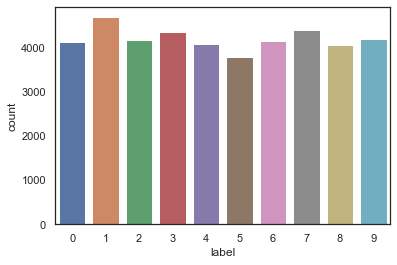

In [5]:
sns.countplot(Y_train)
#note that the numbers of values for each number is about the same, so we don't have to really change this.

In [6]:
train = tf.keras.utils.normalize(train, axis = 1)
test = tf.keras.utils.normalize(test, axis = 1)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#imports 
from keras import models
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense


In [8]:
'''model = models.Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')
model.fit(train, Y_train, epochs = 10)'''

"model = models.Sequential()\nmodel.add(Flatten())\nmodel.add(Dense(128, activation = 'relu'))\nmodel.add(Dense(128, activation = 'relu'))\nmodel.add(Dense(10, activation = 'softmax'))\nmodel.compile(optimizer = 'adam',\n             loss = 'sparse_categorical_crossentropy',\n             metrics = 'accuracy')\nmodel.fit(train, Y_train, epochs = 10)"

In [9]:
#ypreds = model.predict(test)
#print(ypreds)
#preds = np.argmax(ypreds,axis = 1)
#print(preds)

In [10]:
#submit=pd.DataFrame()
#submit['ImageId']=range(1,28001)
#submit['Label']=preds
#submit.to_csv('submit.csv',index=False)

In [11]:
#import keras modules
from keras import models
from keras.layers import Dropout,Flatten,Dense

In [12]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
model = Sequential()
tf.keras.optimizers.Adam(
    learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', 
)
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train, Y_train, epochs = 15,  batch_size=20, validation_split = 0.2)

Epoch 1/15
1680/1680 [==============================] - 100s 60ms/step - loss: 0.2451 - accuracy: 0.9232 - val_loss: 0.0576 - val_accuracy: 0.9827
Epoch 2/15
1680/1680 [==============================] - 99s 59ms/step - loss: 0.0905 - accuracy: 0.9730 - val_loss: 0.0456 - val_accuracy: 0.9845
Epoch 3/15
1680/1680 [==============================] - 99s 59ms/step - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 4/15
1680/1680 [==============================] - 99s 59ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 5/15
1680/1680 [==============================] - 99s 59ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0590 - val_accuracy: 0.9850
Epoch 6/15
1680/1680 [==============================] - 99s 59ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0416 - val_accuracy: 0.9904
Epoch 7/15
1680/1680 [==============================] - 99s 59ms/step - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0331 

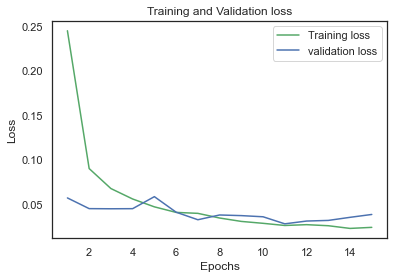

In [15]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

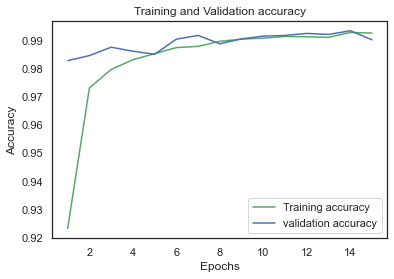

In [16]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
ypreds = model.predict(test)
print(ypreds)
preds = np.argmax(ypreds,axis = 1)
print(preds)

[[1.9551349e-16 3.0007010e-16 1.0000000e+00 ... 1.6465285e-14
  2.0053045e-17 5.2438006e-24]
 [1.0000000e+00 1.9241187e-16 1.2355586e-11 ... 2.5250792e-13
  1.4540996e-13 5.4709119e-12]
 [4.2834858e-19 1.2251649e-15 1.1042500e-16 ... 2.8755732e-14
  2.0839198e-12 1.0000000e+00]
 ...
 [1.1225617e-20 5.9980550e-15 3.1213647e-17 ... 2.5820215e-14
  3.1144250e-13 1.9413063e-14]
 [1.9976647e-11 1.1553153e-11 1.2063227e-11 ... 1.7783560e-08
  1.8705590e-09 9.9999833e-01]
 [8.3248085e-22 1.3391620e-18 1.0000000e+00 ... 7.2108365e-17
  1.8459642e-17 9.7796350e-26]]
[2 0 9 ... 3 9 2]


In [18]:
submit=pd.DataFrame()
submit['ImageId']=range(1,28001)
submit['Label']=preds
submit.to_csv('submit.csv',index=False)